<h1> <b> Sales and Profit Analysis </b> </h1>

<h4><b>Questions :- </b></h4>

**Q-1. What is the trend of sales and profit over time ?** <br>
**Q-2. Which regions and markets contribute the most to sales and profit ?** <br>
**Q-3. Which cities and states are the most profitable ?** <br>
**Q-4. Which products are the most popular (highest quantity sold)?** <br>
**Q-5. What is the Sales and Profit distribution across different Markets ?**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import ScalarFormatter

In [2]:
data = pd.read_csv("Super_International_Market.csv", encoding = 'latin1')
data.sort_index()
df = data.copy()

In [3]:
df.sort_index()
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,5/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,17-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,28-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,5/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
5,22732,IN-2013-42360,28-06-2013,28-06-2013,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical
6,30570,IN-2011-81826,11/7/2011,7/11/2011,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,...,FUR-CH-10004050,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.77,Critical
7,31192,IN-2012-86369,14-04-2012,14-04-2012,Standard Class,MB-18085,Mick Brown,Consumer,Hamilton,Waikato,...,FUR-TA-10002958,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.840,6,0.0,996.4800,878.38,High
8,40155,CA-2014-135909,14-10-2014,14-10-2014,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.4850,867.69,Low
9,40936,CA-2012-116638,28-01-2012,28-01-2012,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical


In [4]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,20-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,12/2/2013,2/12/2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,18-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium
51289,6147,MX-2012-134460,22-05-2012,22-05-2012,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.00,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [6]:
df.shape

(51290, 24)

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [8]:
df.describe(include= 'all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.00000,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,NaN,25035,1430,1430,4,1590,795,3,3636,1094,...,10292,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,NaN,CA-2014-100111,18-06-2014,18-06-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,...,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,14,135,135,30775,97,108,26518,915,2001,...,35,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375915,NaN
std,14806.29199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296804,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.000000,NaN
25%,12823.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN
50%,25645.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,NaN
75%,38467.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,NaN


In [9]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format = 'mixed', dayfirst = True)

In [11]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format ='mixed', dayfirst = True)

In [12]:
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1430
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [13]:
df['Ship Mode'] = df['Ship Mode'].astype('category')
df['Segment'] = df['Segment'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Market'] = df['Market'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Sub-Category'] = df['Sub-Category'].astype('category')
df['Order Priority'] = df['Order Priority'].astype('category')

In [14]:
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode               category
Customer ID               object
Customer Name             object
Segment                 category
City                      object
State                     object
Country                 category
Postal Code              float64
Market                  category
Region                  category
Product ID                object
Category                category
Sub-Category            category
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority          category
dtype: object

<h3> <b> Data Cleaning </b> </h3>

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [17]:
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mode()[0])

In [18]:
df[df['Profit'] >= 0]['Profit'].mean()

np.float64(61.634838357507874)

In [19]:
df.loc[df['Profit'] < 0,'Profit'] = df[df['Profit'] >= 0]['Profit'].mean()

***Negative values of 'Profit' have been replaced with the mean of non_negative profits***

In [20]:
df['Profit'].head(25)

0      762.184500
1       61.634838
2      919.971000
3       61.634838
4      311.520000
5      763.275000
6      564.840000
7      996.480000
8     1906.485000
9       61.634838
10      83.281000
11     647.550000
12    1151.400000
13     622.020000
14    1036.080000
15     186.948000
16     517.479300
17    3979.080000
18      28.404000
19     818.280000
20     276.840000
21     341.994000
22     358.020000
23    1898.400000
24     445.520000
Name: Profit, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  category      
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  category      
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  category      
 11  Postal Code     51290 non-null  float64       
 12  Market          51290 non-null  category      
 13  Region          51290 non-null  category      
 14  Product ID      51290 non-null  object        
 15  Ca

***Segmenting the data***

In [22]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [23]:
df = df[['Customer ID', 'Customer Name', 'Category', 'Product Name', 'Sub-Category', 'Sales', 'Profit',
         'Quantity', 'Discount', 'Order Date', 'City', 'State', 'Region', 'Market', 'Order Priority']]

<h2>Analysis</h2>

**Q-1. What is the trend of sales and profit over time ?** <br>
**Q-2. Which regions and markets contribute the most to sales and profit ?** <br>
**Q-3. Which cities and states are the most profitable ?** <br>
**Q-4. Which products are the most popular (highest quantity sold)?** <br>
**Q-5. What is the Sales and Profit distribution across different Markets ?**

<h3>Q - What is the trend of sales and profit over time ?</h3>

In [24]:
df.loc[:, 'Order Year'] = df['Order Date'].dt.year
SP_Trend = df.groupby('Order Year')[['Sales','Profit']].sum()
print(SP_Trend)

                   Sales        Profit
Order Year                            
2011        2.259451e+06  5.552016e+05
2012        2.677439e+06  6.684937e+05
2013        3.405746e+06  8.575934e+05
2014        4.299866e+06  1.079962e+06


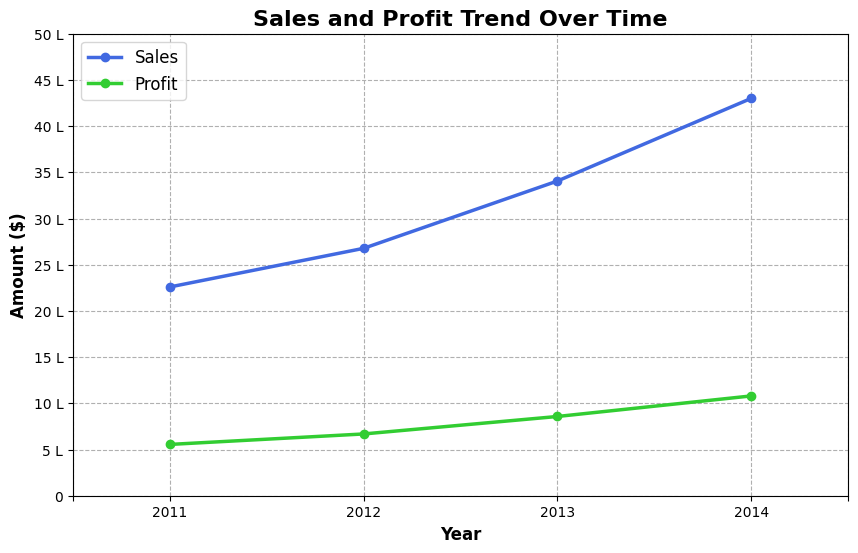

In [25]:
plt.figure(figsize =(10,6))
plt.plot(SP_Trend['Sales'], label = ['Sales'], color = '#4169E1', linewidth = 2.5, marker = 'o')
plt.plot(SP_Trend['Profit'], label = ['Profit'], color = '#32CD32', linewidth = 2.5, marker = 'o')

plt.xlabel('Year', fontsize = 12, fontweight = 'bold')
plt.ylabel('Amount ($)', fontsize = 12, fontweight = 'bold')
plt.grid(True, linestyle = '--')
plt.xticks(ticks = [2010.5,2011,2012,2013,2014,2014.5], labels = ["",2011,2012,2013,2014,""])
plt.yticks(ticks = [0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000,5000000], 
           labels = [0,'5 L', '10 L', '15 L', '20 L', '25 L', '30 L', '35 L', '40 L', '45 L', '50 L'])
plt.title('Sales and Profit Trend Over Time', fontsize = 16, fontweight = 'bold')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

<h4> <b> Sales and profit Trend Report </b> </h3>

The line chart shows a consistent upward trend in both sales (represented by blue line) and profit (represented by green line) over the years. Sales growth indicates increasing revenue, while the profit trend highlights improved profitability. Year-to-year fluctuations reflect market and operatioal impacts, but the overall trajectory suggests strong business performance.

<h3>Q - Which regions and markets contribute the most to sales and profit ?</h3>

In [26]:
rs = df.groupby(['Region'], observed = False)['Sales'].sum().sort_values(ascending = False).reset_index().head(5)
rp = df.groupby(['Region'], observed = False)['Profit'].sum().sort_values(ascending = False).reset_index().head(5)
ms = df.groupby(['Market'], observed = False)['Sales'].sum().sort_values(ascending = False).reset_index().head(5)
mp = df.groupby(['Market'], observed = False)['Profit'].sum().sort_values(ascending = False).reset_index().head(5)

In [27]:
rp

,Region,Profit
0,Central,685068.468851
1,South,401630.118507
2,North,302882.130224
3,EMEA,265949.434402
4,Oceania,241333.589821


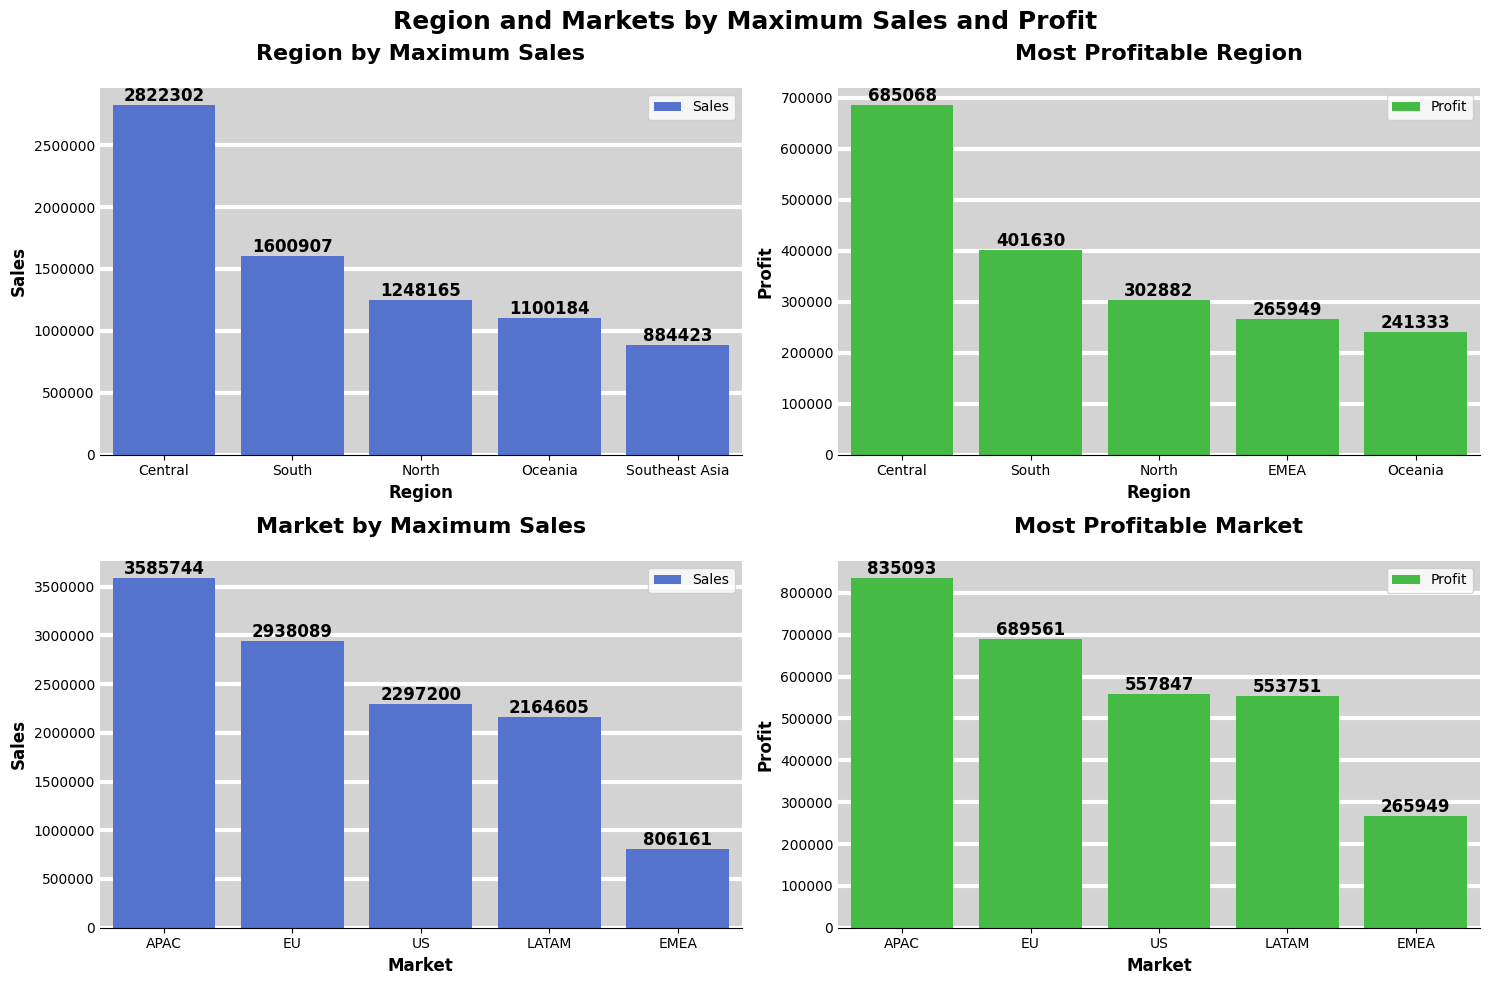

In [28]:
fig, axs = plt.subplots(2,2,figsize = (15,10))

rsb = sns.barplot(data = rs, x = 'Region', y = 'Sales', order = rs['Region'], ax = axs[0,0], zorder = 2, color = '#4169E1', label = 'Sales')

for i in rsb.containers:
    rsb.bar_label(i, fmt = '%d', fontsize = 12, fontweight = 'bold')

axs[0,0].set_title('Region by Maximum Sales', fontweight = 'bold', fontsize = 16, pad = 20)
axs[0,0].set_xlabel('Region', fontweight = 'bold', fontsize = 12)
axs[0,0].set_ylabel('Sales', fontweight = 'bold', fontsize = 12)
axs[0,0].yaxis.set_major_formatter(ScalarFormatter(useMathText = False))
axs[0,0].ticklabel_format(style = 'plain', axis ='y')
axs[0,0].spines[['left','right', 'top']].set_visible(False)
axs[0,0].tick_params(axis = 'y', length = 0)
axs[0,0].set_facecolor('lightgrey')
axs[0,0].grid(axis = 'y', color = 'white', linewidth = 3, zorder = 1)
axs[0,0].legend()

rpb = sns.barplot(data = rp, x = 'Region', y = 'Profit', order = rp['Region'], ax = axs[0,1], zorder = 2, color = '#32CD32', label = 'Profit')

for i in rpb.containers:
    rpb.bar_label(i, fmt = '%d', fontsize = 12, fontweight = 'bold')

axs[0,1].set_title('Most Profitable Region', fontweight = 'bold', fontsize = 16, pad = 20)
axs[0,1].set_xlabel('Region', fontweight = 'bold', fontsize = 12)
axs[0,1].set_ylabel('Profit', fontweight = 'bold', fontsize = 12)
axs[0,1].spines[['left','right', 'top']].set_visible(False)
axs[0,1].tick_params(axis = 'y', length = 0)
axs[0,1].set_facecolor('lightgrey')
axs[0,1].grid(axis = 'y', color = 'white', linewidth = 3, zorder = 1)
axs[0,1].legend()

msb = sns.barplot(data = ms, x = 'Market', y = 'Sales',order=ms['Market'], ax= axs[1,0], zorder = 2, color = '#4169E1', label = 'Sales')

for i in msb.containers:
    msb.bar_label(i, fmt = '%d', fontsize = 12, fontweight = 'bold')

axs[1,0].set_title('Market by Maximum Sales', fontweight = 'bold', fontsize = 16, pad = 20)
axs[1,0].set_xlabel('Market', fontweight = 'bold', fontsize = 12)
axs[1,0].set_ylabel('Sales', fontweight = 'bold', fontsize = 12)
axs[1,0].yaxis.set_major_formatter(ScalarFormatter(useMathText = False))
axs[1,0].ticklabel_format(style = 'plain', axis ='y')
axs[1,0].spines[['left','right', 'top']].set_visible(False)
axs[1,0].tick_params(axis = 'y', length = 0)
axs[1,0].set_facecolor('lightgrey')
axs[1,0].grid(axis = 'y', color = 'white', linewidth = 3, zorder = 1)
axs[1,0].legend()

mpb = sns.barplot(data = mp, x = 'Market', y = 'Profit',order=mp['Market'], ax= axs[1,1], zorder = 2, color = '#32CD32', label = 'Profit')

for i in mpb.containers:
    mpb.bar_label(i, fmt = '%d', fontsize = 12, fontweight = 'bold')

axs[1,1].set_title('Most Profitable Market', fontweight = 'bold', fontsize = 16, pad = 20)
axs[1,1].set_xlabel('Market', fontweight = 'bold', fontsize = 12)
axs[1,1].set_ylabel('Profit', fontweight = 'bold', fontsize = 12)
axs[1,1].spines[['left','right', 'top']].set_visible(False)
axs[1,1].tick_params(axis = 'y', length = 0)
axs[1,1].set_facecolor('lightgrey')
axs[1,1].grid(axis = 'y', color = 'white', linewidth = 3, zorder = 1)
axs[1,1].legend()

plt.suptitle('Region and Markets by Maximum Sales and Profit', fontweight = 'bold', fontsize = 18)
fig.tight_layout();

**The above visualization show the top 5 Regions or Markets with the Maximum Sales and Maximum Profit gained. The top 5 Regions and Market with the maximum Profit generated are shown with green bars. While, the top 5 regions and market with the maximum revenue are shown with blue bars. For precise number of Sales and Profit generated in each Region or Market, both the Profit and Sales charts have precise value of the particular Region or Market written above the bars in the visualization.**

<h3>Q - Which cities and states are the most profitable?</h3>

In [29]:
sp = df.groupby(['State'])['Profit'].sum().sort_values(ascending = False).reset_index().head()
cp = df.groupby(['City'])['Profit'].sum().sort_values(ascending = False).reset_index().head()

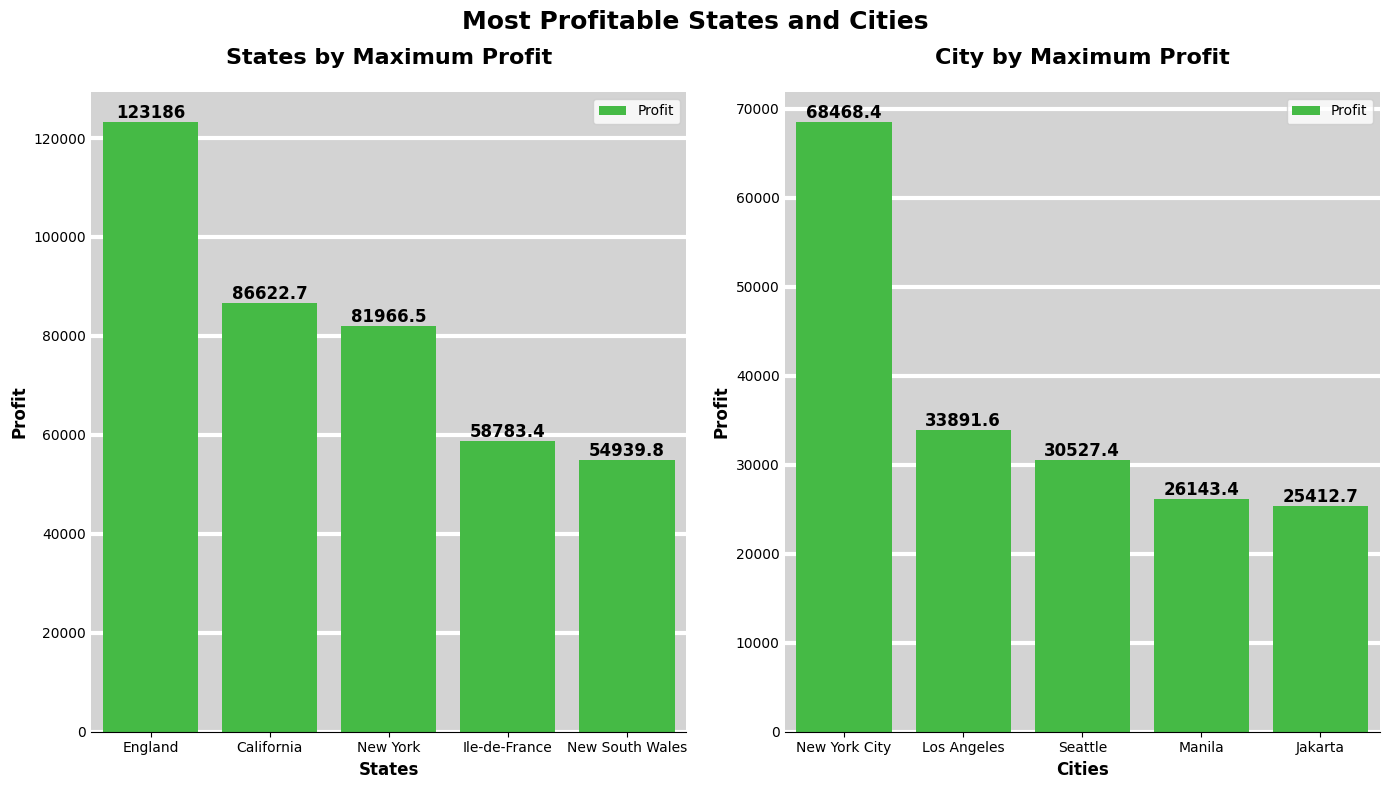

In [30]:
fig, axs = plt.subplots(1,2,figsize = (14,8))

spb = sns.barplot(data = sp, x = 'State', y = 'Profit', order = sp['State'], ax = axs[0], zorder = 2, color = '#32CD32', label = 'Profit')

for i in spb.containers:
    spb.bar_label(i, fontsize = 12, fontweight = 'bold')

axs[0].set_title('States by Maximum Profit', fontweight = 'bold', fontsize = 16, pad = 20)
axs[0].set_xlabel('States', fontweight = 'bold', fontsize = 12)
axs[0].set_ylabel('Profit', fontweight = 'bold', fontsize = 12)
axs[0].yaxis.set_major_formatter(ScalarFormatter(useMathText = False))
axs[0].ticklabel_format(style = 'plain', axis ='y')
axs[0].spines[['left','right', 'top']].set_visible(False)
axs[0].tick_params(axis = 'y', length = 0)
axs[0].set_facecolor('lightgrey')
axs[0].grid(axis = 'y', color = 'white', linewidth = 3, zorder = 1)
axs[0].legend()


cpb = sns.barplot(data = cp, x = 'City', y = 'Profit', order = cp['City'], ax = axs[1], zorder = 2, color = '#32CD32', label = 'Profit')

for i in cpb.containers:
    cpb.bar_label(i, fontsize = 12, fontweight = 'bold')

axs[1].set_title('City by Maximum Profit', fontweight = 'bold', fontsize = 16, pad = 20)
axs[1].set_xlabel('Cities', fontweight = 'bold', fontsize = 12)
axs[1].set_ylabel('Profit', fontweight = 'bold', fontsize = 12)
axs[1].yaxis.set_major_formatter(ScalarFormatter(useMathText = False))
axs[1].ticklabel_format(style = 'plain', axis ='y')
axs[1].spines[['left','right', 'top']].set_visible(False)
axs[1].tick_params(axis = 'y', length = 0)
axs[1].set_facecolor('lightgrey')
axs[1].grid(axis = 'y', color = 'white', linewidth = 3, zorder = 1)
axs[1].legend()

plt.suptitle('Most Profitable States and Cities', fontweight = 'bold', fontsize = 18)
fig.tight_layout();

**The above visualizasion shows the most profitable States and Cities indivdually. The left bar chart shows the top 5 most profitable States and the profit they generated above each bar. The right bar chart shows the top 5 most profitable Cities and the profit they generated above each bar. These visualizasions provide a quick comparision of Profitability across the the top 5 States and Cities.**

<h3>Q - Which Products are the most popular (highest quantity sold) ?</h3>

In [31]:
pq = df.groupby(['Product Name'], as_index=False)['Quantity'].sum().sort_values(by = 'Quantity',ascending=False).head()

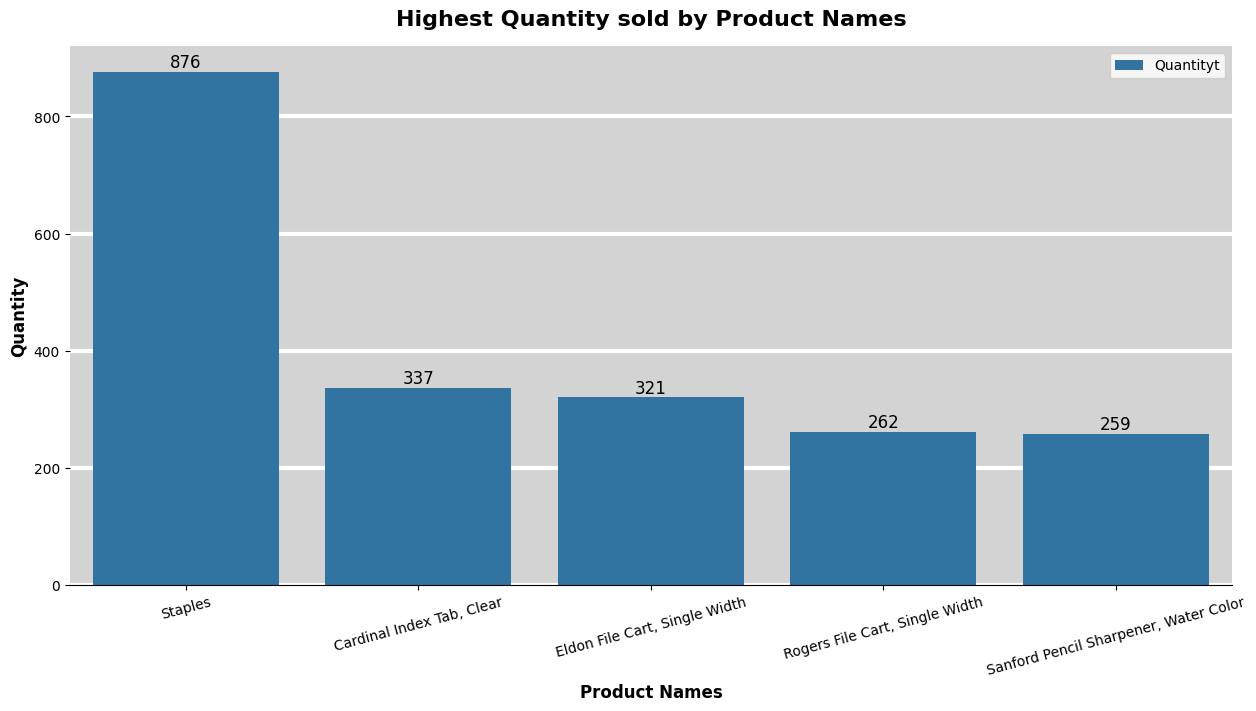

In [32]:
plt.figure(figsize = (15,7))
pqb = sns.barplot(data = pq, x = 'Product Name', y = 'Quantity', order = pq['Product Name'], label = 'Quantityt', zorder = 2)

for i in pqb.containers:
    pqb.bar_label(i, fontsize = 12)

plt.title('Highest Quantity sold by Product Names', fontweight = 'bold', fontsize = 16, pad = 15)
plt.xlabel('Product Names', fontweight = 'bold', fontsize = 12)
plt.ylabel('Quantity', fontweight = 'bold', fontsize = 12)
plt.gca().spines[['left','right', 'top']].set_visible(False)
plt.gca().set_facecolor('lightgrey')
plt.grid(axis = 'y', color = 'white', linewidth = 3, zorder = 1)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText = False))
plt.xticks(rotation = 15)
plt.legend()

Text(0.5, 1.0, 'Highest Quantity sold by Product Names')

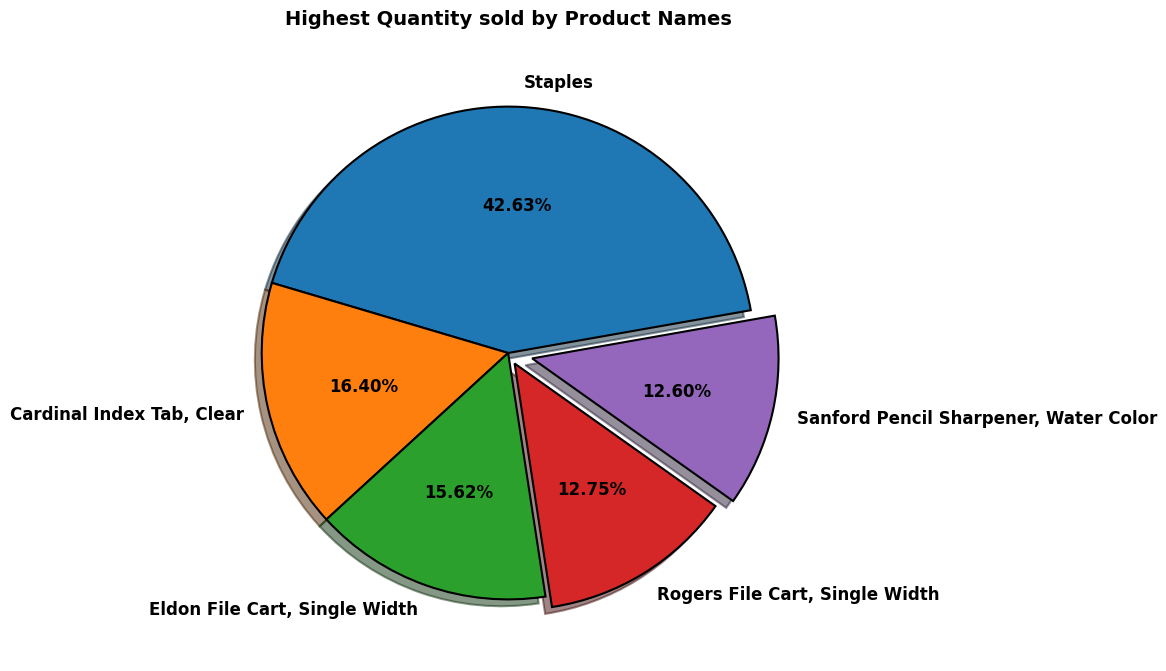

In [33]:
plt.figure(figsize =(8,8))

plt.pie(data = pq, x = pq['Quantity'], autopct = '%1.2f%%', shadow = True, labels = pq['Product Name'], wedgeprops= {'linewidth': 1.5, 'edgecolor': 'black'}, 
        textprops={'fontweight':'bold','fontsize':12}, explode = (0,0,0,0.05,0.1), startangle = 10)
plt.title('Highest Quantity sold by Product Names', fontsize = 14, fontweight = 'bold', pad = 15)

<h4> <b> Report: Most Popular Products by Quantity Sold </b> </h4>

**Bar Chart :- The above Barchart shows the exact quantity of the top 5 most sold products.** <br>
**Pie Chart :- The above Pie chart shows the proportion of these top 5 products by their total quantity sold.**

<h3>Q - What is the sales and profit distribution across different markets ?</h3>

In [34]:
msp = df.groupby(['Market'], observed=False)[['Profit','Sales']].sum().sort_values(by='Sales', ascending= False).reset_index()

In [40]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(x = msp['Market'], y = msp['Sales'],  name = 'Sales',hovertemplate='Sales: $%{y:.0f}<extra></extra>', marker = dict(color = 'Blue')))
fig.add_trace(go.Bar(x = msp['Market'], y = msp['Profit'],  name = 'Profit',hovertemplate='Profit: $%{y:.0f}<extra></extra>', marker = dict(color = 'Green')))

fig.update_layout(
    title=dict(
        text='Sales & Profit Distribution Across Different Markets',
        font=dict(size=20, family='Arial', color='black', weight='bold')  # Title font
    ),
    xaxis=dict(
        title=dict(
            text='Market',
            font=dict(size=16, family='Arial', color='black', weight='bold')
        ),
        tickangle=-45
    ),
    yaxis=dict(
        title = dict(text='Sales and Profit Distribution',
            font = dict(size=16, family='Arial', color='black', weight='bold')
        ), 
        tickprefix='$',
        tickformat=',.0f',
        separatethousands=True
    ),
    width=1000,
    height=600,
    barmode='stack'
)



<h4> Report: Sales and Profit Distribution Across Different Markets </h4>

**The analysis of sales and profit distribution across different markets was visualized using a stacked bar chart. The chart displays Sales in blue and Profit in green for each market. By stacking these values, it becomes easy to compare the total contribution of sales and profit within each market.**

**The chart highlights which markets are the most profitable and which generate the highest sales. Markets with larger bars indicate higher overall sales and profit, while smaller bars suggest lower contributions in these areas. This visualization allows for a clear, comparative understanding of market performance in terms of both sales and profitability.**